<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
from collections import Counter
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy
from spacy.tokenizer import Tokenizer

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read thru the documentation to accomplish this task. 

`Tip:` You will need to install the `bs4` library inside your conda environment. 

In [2]:
# Classics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

import squarify
import spacy
nlp = spacy.load("en_core_web_lg")

In [20]:
from bs4 import BeautifulSoup
import requests

df = pd.read_csv(r'data/job_listings.csv')
print(df.shape)
df.head()
##### Your Code Here #####
# raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

(426, 3)


,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [21]:
df['description'] = df['description'].apply(lambda x: x[2:-1].replace('\\n', ' '))
df['description'] = [BeautifulSoup(text).get_text() for text in df['description'] ]
df.head()

,Unnamed: 0,description,title
0,0,Job Requirements: Conceptual understanding in ...,Data scientist
1,1,"Job Description As a Data Scientist 1, you wi...",Data Scientist I
2,2,As a Data Scientist you will be working on con...,Data Scientist - Entry Level
3,3,"$4,969 - $6,756 a monthContractUnder the gener...",Data Scientist
4,4,Location: USA \xe2\x80\x93 multiple locations ...,Data Scientist


## 2) Use Spacy to tokenize the listings 

In [22]:
tokenizer = Tokenizer(nlp.vocab)

In [23]:
STOP_WORDS = nlp.Defaults.stop_words.union([' '])

In [24]:
tokens = []

"""create tokens without stop,, punct, pronouns or extended stop words"""
for doc in tokenizer.pipe(df['description'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if ((token.is_stop == False) and (token.is_punct == False) and (token.pos_!= 'PRON') and token.text.lower() not in STOP_WORDS):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

df['tokens'] = tokens

In [25]:
df.head()

,Unnamed: 0,description,title,tokens
0,0,Job Requirements: Conceptual understanding in ...,Data scientist,"[job, requirements:, conceptual, understanding..."
1,1,"Job Description As a Data Scientist 1, you wi...",Data Scientist I,"[job, description, data, scientist, 1,, help, ..."
2,2,As a Data Scientist you will be working on con...,Data Scientist - Entry Level,"[data, scientist, working, consulting, busines..."
3,3,"$4,969 - $6,756 a monthContractUnder the gener...",Data Scientist,"[$4,969, $6,756, monthcontractunder, general, ..."
4,4,Location: USA \xe2\x80\x93 multiple locations ...,Data Scientist,"[location:, usa, \xe2\x80\x93, multiple, locat..."


In [26]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [27]:
wc = count(df['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
63,data,421,3914,1.0,0.029385,0.029385,0.988263
73,experience,401,1668,2.0,0.012523,0.041908,0.941315
20,work,350,1063,3.0,0.007981,0.049889,0.821596
192,business,303,1052,4.0,0.007898,0.057787,0.711268
193,team,325,787,5.0,0.005909,0.063695,0.762911


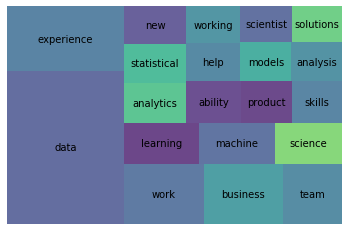

In [28]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [45]:
df.head()

,Unnamed: 0,description,title,tokens
0,0,Job Requirements: Conceptual understanding in ...,Data scientist,"[job, requirements:, conceptual, understanding..."
1,1,"Job Description As a Data Scientist 1, you wi...",Data Scientist I,"[job, description, data, scientist, 1,, help, ..."
2,2,As a Data Scientist you will be working on con...,Data Scientist - Entry Level,"[data, scientist, working, consulting, busines..."
3,3,"$4,969 - $6,756 a monthContractUnder the gener...",Data Scientist,"[$4,969, $6,756, monthcontractunder, general, ..."
4,4,Location: USA \xe2\x80\x93 multiple locations ...,Data Scientist,"[location:, usa, \xe2\x80\x93, multiple, locat..."


In [49]:
def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

In [50]:
# Tunning Parameters

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', 
                        ngram_range=(1,2),
                        max_df=.97,
                        min_df=3,
                        tokenizer=tokenize)

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(data) # Similiar to fit_predict

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,,,1,2,3,4,5,6,\xc2\xbb,\xef\x83\x98,...,you\xe2\x80\x99ll work,you\xe2\x80\x99re,you\xe2\x80\x99re data,you\xe2\x80\x99re look,you\xe2\x80\x99re ready,you\xe2\x80\x99ve,you\xe2\x80\x99ve work,yrs,|,||
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.066967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.030071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.061634,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 4) Visualize the most common word counts

/Applications/anaconda3/envs/U4-S1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


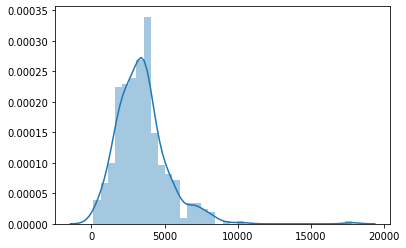

In [52]:
doc_len = [len(doc) for doc in data]

sns.distplot(doc_len); # Visualizing the lenth of characters.


## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [55]:
# Tunning Parameters
data = dtm

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english')
# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(data) # Similiar to fit_predict

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
print(dtm.shape)
dtm.head()

(3014, 3014)


,000,10,100,11,12,15,17,20,200,2012,...,xc2,xe2,xef,xgboost,year,years,yearthe,yes,york,yrs
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [56]:
# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [57]:
nn.kneighbors([dtm.iloc[0].values])

(array([[0.        , 1.41421356, 1.41421356, 1.41421356, 1.41421356]]),
 array([[   0, 2967, 2969, 2968, 2965]]))

In [58]:
dream_ds_job = ["""
As a Data Scientist, you will evaluate and improve Google's products. You will collaborate with a multi-disciplinary team of engineers and analysts on a wide range of problems. This position will bring scientific rigor and statistical methods to the challenges of product creation, development and improvement with an appreciation for the behaviors of the end user.
"""]

In [59]:
new = tfidf.transform(dream_ds_job)
nn.kneighbors(new.todense())

(array([[1.25816182, 1.25816182, 1.25816182, 1.25816182, 1.25816182]]),
 array([[345, 188, 764, 794, 645]]))

In [68]:
df['title'][188]

'Senior Data Scientist'

In [69]:
df['description'][188]

'Conducts research using advanced statistical and computational methods to improve quality, cost, and the overall experience of care provided. Expertise in statistical methodology, computation, research, healthcare, and communication. Requires regular and frequent exercise of independent judgment and decision-making in sensitive situations.   Essential Functions With minimal guidance, use advanced statistical and computational methodologies to deliver insights and strategic opportunities to improve the quality, patient experience, and cost of healthcare Establish scalable, efficient, and automated processes for large scale data analyses and model development, validation, and implementation Proactively monitor and analyze complex systems to understand, diagnose, and continuously improve key performance indicators Expertise in problem definition, i.e., able to translate business/research questions into analytical questions and translate analytical results into business/research solutions

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 